In [16]:
!pip install adjustText


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
deg_females_over_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_>80.csv", index_col=0)

deg_females_70_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_70-80.csv", index_col=0)

deg_females_50_70 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_50-70.csv", index_col=0)

deg_females_30_50 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Female_30-50.csv", index_col=0)

deg_males_over_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_>80.csv", index_col=0)

deg_males_70_80 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_70-80.csv", index_col=0)

deg_males_50_70 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_50-70.csv", index_col=0)

deg_males_30_50 = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/dge_stratified/DEGs_stratified_Male_30-50.csv", index_col=0)

In [6]:
import anndata as ad
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.

In [7]:
# Get gene symbol mapping
symbol_mapping = ppmi_ad.varm['symbol_ensembl_mapping']
ensembl_to_symbol = dict(zip(symbol_mapping.index, symbol_mapping['gene_symbol']))

In [11]:
# deg_females_over_80['symbol'] = deg_females_over_80.index.map(ensembl_to_symbol)
# deg_females_70_80['symbol'] = deg_females_70_80.index.map(ensembl_to_symbol)
# deg_females_50_70['symbol'] = deg_females_50_70.index.map(ensembl_to_symbol)
# deg_females_30_50['symbol'] = deg_females_30_50.index.map(ensembl_to_symbol)
#
# deg_males_over_80['symbol'] = deg_males_over_80.index.map(ensembl_to_symbol)
# deg_males_70_80['symbol'] = deg_males_70_80.index.map(ensembl_to_symbol)
# deg_males_50_70['symbol'] = deg_males_50_70.index.map(ensembl_to_symbol)
# deg_males_30_50['symbol'] = deg_males_30_50.index.map(ensembl_to_symbol)


In [3]:
deg_males_30_50_limit = deg_males_30_50[(deg_males_30_50['log2FoldChange'].abs() >= 1) & (deg_males_30_50['log2FoldChange'].abs() < 10) & (deg_males_30_50['padj'] <= 0.05)]
deg_males_50_70_limit = deg_males_50_70[(deg_males_50_70['log2FoldChange'].abs() >= 1) & (deg_males_50_70['log2FoldChange'].abs() < 10) & (deg_males_50_70['padj'] <= 0.05)]
deg_males_70_80_limit = deg_males_70_80[(deg_males_70_80['log2FoldChange'].abs() >= 1) & (deg_males_70_80['log2FoldChange'].abs() < 10) & (deg_males_70_80['padj'] <= 0.05)]
deg_males_over_80_limit = deg_males_over_80[(deg_males_over_80['log2FoldChange'].abs() >= 1) & (deg_males_over_80['log2FoldChange'].abs() < 10) & (deg_males_over_80['padj'] <= 0.05)]

deg_females_30_50_limit = deg_females_30_50[(deg_females_30_50['log2FoldChange'].abs() >= 1) & (deg_females_30_50['log2FoldChange'].abs() < 10) & (deg_females_30_50['padj'] <= 0.05)]
deg_females_50_70_limit = deg_females_50_70[(deg_females_50_70['log2FoldChange'].abs() >= 1) & (deg_females_50_70['log2FoldChange'].abs() < 10) & (deg_females_50_70['padj'] <= 0.05)]
deg_females_70_80_limit = deg_females_70_80[(deg_females_70_80['log2FoldChange'].abs() >= 1) & (deg_females_70_80['log2FoldChange'].abs() < 10) & (deg_females_70_80['padj'] <= 0.05)]
deg_females_over_80_limit = deg_females_over_80[(deg_females_over_80['log2FoldChange'].abs() >= 1) & (deg_females_over_80['log2FoldChange'].abs() < 10) & (deg_females_over_80['padj'] <= 0.05)]

In [7]:
import pandas as pd

dataframes = {
    'males_50_70': deg_males_50_70_limit,
    'males_70_80': deg_males_70_80_limit,
    'males_over_80': deg_males_over_80_limit,
    'females_50_70': deg_females_50_70_limit,
    'females_70_80': deg_females_70_80_limit,
    'females_over_80': deg_females_over_80_limit
}

consolidated_data = []

for key, df in dataframes.items():
    gender, age_group = key.split('_', 1)
    age_group = age_group.replace('_', '-')

    temp_df = df[['gene_symbol', 'padj', 'log2FoldChange']].copy()
    temp_df['gender'] = gender
    temp_df['age_group'] = age_group

    consolidated_data.append(temp_df)

final_df = pd.concat(consolidated_data, ignore_index=True)

final_df.sort_values(['gender', 'age_group', 'gene_symbol'], inplace=True)

final_df.reset_index(drop=True, inplace=True)

KeyError: "['gene_symbol'] not in index"

In [135]:
final_df

,gene_symbol,padj,log2FoldChange,gender,age_group
0,C4BPA,2.614254e-02,-1.693648,females,50-70
1,LINC03126,7.300453e-05,3.817776,females,50-70
2,RNVU1-2A,4.864783e-02,-1.347496,females,50-70
3,ENSG00000228351,5.281693e-05,9.305268,females,70-80
4,ENSG00000229912,1.927640e-02,-1.743230,females,70-80
5,ENSG00000257025,5.567580e-06,-6.983990,females,70-80
6,ENSG00000261743,2.655312e-02,-3.113722,females,70-80
7,LCN1,1.362966e-02,-1.313859,females,70-80
8,MIR34B,2.331556e-02,-1.690631,females,70-80
9,MYOZ1,2.983255e-02,-3.203596,females,70-80


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Create the direction matrix (-1=down, 0=absent, 1=up)
direction_data = final_df.pivot_table(
    index='gene_symbol',
    columns=['gender', 'age_group'],
    values='log2FoldChange',
    aggfunc=lambda x: 1 if any(x >= 1) else (-1 if any(x <= -1) else 0),
    fill_value=0
)

# Flatten multi-index columns
direction_data.columns = ['_'.join(col).strip() for col in direction_data.columns.values]

# Filter for genes that appear in at least one group
direction_data = direction_data[direction_data.abs().sum(axis=1) > 0]

# Create custom colormap
cmap = ListedColormap(['royalblue', 'white', 'indianred'])  # -1=blue, 0=white, 1=red

# Create the plot
plt.figure(figsize=(12, max(8, len(direction_data)//3)))

# Create heatmap and store the returned object
heatmap = sns.heatmap(
    direction_data,
    cmap=cmap,
    linewidths=0.5,
    linecolor='lightgray',
    vmin=-1,
    vmax=1,
    cbar=False  # We'll add custom colorbar separately
)

# Add custom colorbar
cbar = plt.colorbar(heatmap.collections[0], ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['Downregulated', 'Absent', 'Upregulated'])
cbar.set_label('Expression Status', rotation=270, labelpad=15)

plt.title('Differentially Expressed Genes by Gender and Age Group')
plt.xlabel('Gender and Age Group')
plt.ylabel('Gene Symbol')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'final_df' is not defined

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text

# Initialize dictionaries to store extreme values
extreme_upregulated_males = {}
extreme_downregulated_males = {}

# Modified plotting function with extreme value filtering
def plot_volcano_with_filtering(ax, df, title, age_group):
    df = df.copy()
    df['gene_symbol'] = df.index.map(ensembl_to_symbol)
    df['-log10(padj)'] = -np.log10(df['padj'])
    df['-log10(pvalue)'] = -np.log10(df['pvalue'])

    # Identify extreme values (|log2FoldChange| > 10)
    extreme_mask = df['log2FoldChange'].abs() > 10
    extreme_df = df[extreme_mask].copy()

    # Store extreme values separately
    extreme_upregulated_males[age_group] = extreme_df[extreme_df['log2FoldChange'] > 10]
    extreme_downregulated_males[age_group] = extreme_df[extreme_df['log2FoldChange'] < -10]

    # Filter for plotting
    plot_df = df[~extreme_mask]

    # Classify points
    plot_df['significance'] = 'Non-significant'
    sig_mask = (plot_df['padj'] <= padj_threshold)
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] >= logfc_threshold), 'significance'] = 'Upregulated'
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] <= -logfc_threshold), 'significance'] = 'Downregulated'

    # Plot
    scatter = sns.scatterplot(
        data=plot_df,
        x='log2FoldChange',
        y='-log10(pvalue)',
        hue='significance',
        hue_order=['Upregulated', 'Downregulated', 'Non-significant'],
        palette={'Upregulated': '#2ecc71', 'Downregulated': '#e74c3c', 'Non-significant': '#95a5a6'},
        alpha=alpha_value,
        s=point_size,
        edgecolor='black',
        linewidth=0.3,
        ax=ax
    )

    # Label significant points (excluding extremes)
    sig_df = plot_df[plot_df['significance'].isin(['Upregulated', 'Downregulated'])]
    sig_df = sig_df[
        (sig_df['padj'] <= 0.05) &
        (sig_df['log2FoldChange'].abs() >= 1)
    ].sort_values(['significance', 'padj'])

    texts = []
    for _, row in sig_df.iterrows():
        texts.append(ax.text(
            row['log2FoldChange'],
            row['-log10(pvalue)'],
            row['gene_symbol'],
            fontsize=8,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=0.2, edgecolor='none')
        ))

    adjust_text(texts,
               ax=ax,
               only_move={'points':'y', 'text':'xy'},  # Basic movement
               force_text=0.2,                         # Single force value
               expand_points=(2, 2),                   # Strong expansion
               precision=0.001)

    # Add thresholds
    ax.axhline(-np.log10(padj_threshold), color='black', linestyle='--', linewidth=0.8)
    ax.axvline(-logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.axvline(logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.set_xlim(-10, 10)  # Set consistent x-axis limits

    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('log$_2$ Fold Change', fontsize=10)
    ax.set_ylabel('-log$_{10}$(p-value)', fontsize=10)
    ax.get_legend().remove()

# Parameters
padj_threshold = 0.05
logfc_threshold = 1
point_size = 35
alpha_value = 0.7

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(wspace=0.4, hspace=0.5)

# Plot each dataframe
plot_volcano_with_filtering(axes[0,0], deg_males_30_50, "Males 30-50", "30-50")
plot_volcano_with_filtering(axes[0,1], deg_males_50_70, "Males 50-70", "50-70")
plot_volcano_with_filtering(axes[1,0], deg_males_70_80, "Males 70-80", "70-80")
plot_volcano_with_filtering(axes[1,1], deg_males_over_80, "Males 80+", "80+")

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Upregulated',
              markerfacecolor='#2ecc71', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Downregulated',
              markerfacecolor='#e74c3c', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Non-significant',
              markerfacecolor='#95a5a6', markersize=10)
]

fig.legend(handles=legend_elements,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.05),
          ncol=3,
          frameon=True)

# plt.savefig('filtered_volcano_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Access extreme values for further analysis
print("\nExtreme upregulated genes (>10 FC) by age group:")
for age_group, df in extreme_upregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange', ascending=False))

print("\nExtreme downregulated genes (<-10 FC) by age group:")
for age_group, df in extreme_downregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange'))

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_22610/982966774.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/adjustText/__init__.py:419: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  ax.figure.draw_without_rendering()


MemoryError: Unable to allocate 12.7 PiB for an array with shape (39789644, 179422094, 2) and data type bool

/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x11db92fc0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [10]:
deg_males_30_50

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Gene,,,,,,
ENSG00000276540.1,2.251762,-29.463374,3.535197,-8.334296,7.796096e-17,4.025124e-12
ENSG00000188199.10,20.602703,-3.087444,0.565696,-5.457780,4.821232e-08,1.244601e-03
ENSG00000188157.14,126.294232,-2.270725,0.427377,-5.313164,1.077380e-07,1.854170e-03
ENSG00000213770.3,6.303746,-2.714475,0.533841,-5.084800,3.680143e-07,2.920054e-03
ENSG00000099994.10,27.154134,-2.598098,0.516970,-5.025628,5.017884e-07,2.920054e-03
...,...,...,...,...,...,...
ENSG00000277927.1,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000276872.1,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000274175.1,0.000000,NaN,NaN,NaN,NaN,NaN


## DEG Visualization - Females

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_36363/2573838031.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_36363/2573838031.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['significance'] = 'Non-significant'
/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_36363/2573838031.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

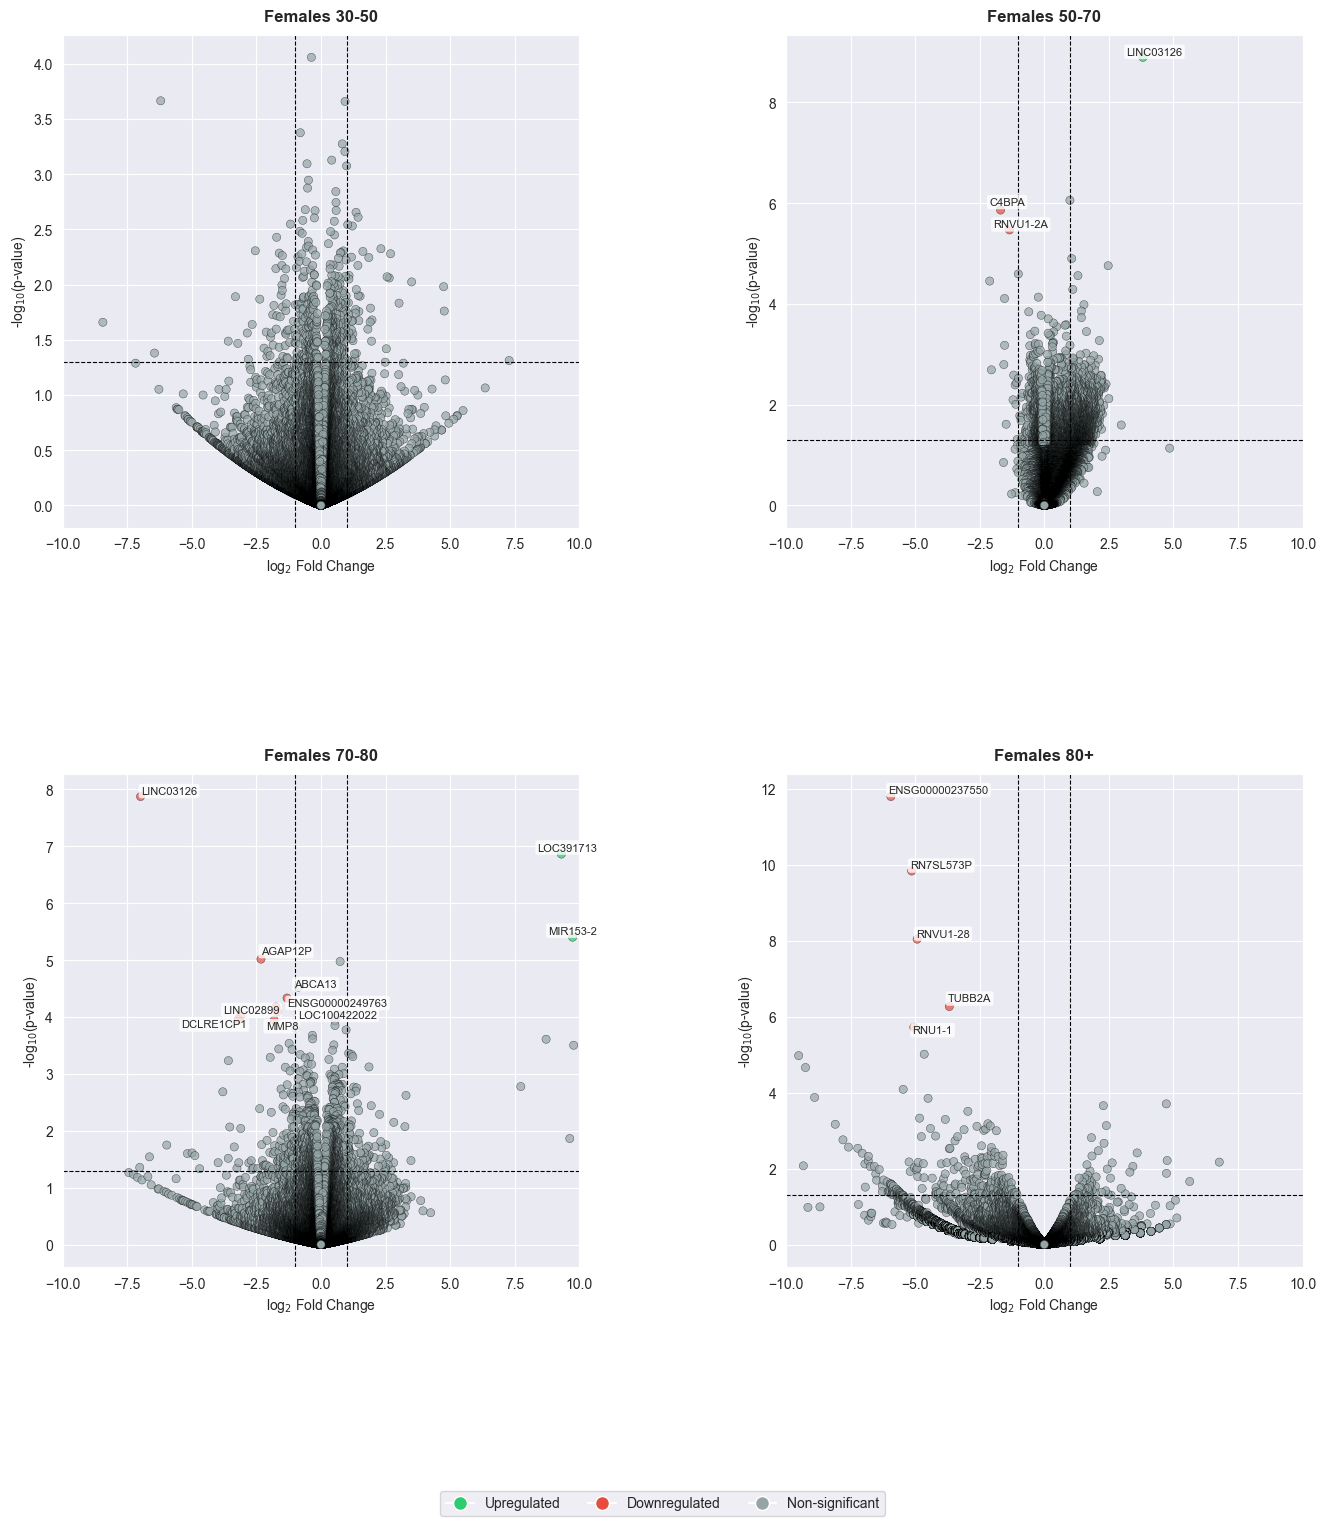


Extreme upregulated genes (>10 FC) by age group:

30-50 (101 genes):
                       gene_symbol  log2FoldChange          padj
Gene                                                            
ENSG00000248417.1  ENSG00000248417       30.000000  2.125265e-12
ENSG00000275414.1  ENSG00000275414       30.000000  2.125265e-12
ENSG00000258170.1  ENSG00000258170       30.000000  2.125265e-12
ENSG00000238003.1          RPL10P4       29.999860  2.125265e-12
ENSG00000212424.1        RNU1-119P       29.999860  2.125265e-12
...                            ...             ...           ...
ENSG00000257078.1  ENSG00000257078       15.139820  2.246993e-02
ENSG00000235146.2  ENSG00000235146       15.081171  2.365069e-02
ENSG00000254804.1  ENSG00000254804       15.073909  2.365069e-02
ENSG00000254339.5  ENSG00000254339       14.996611  2.567215e-02
ENSG00000269320.1          VN1R93P       14.686345  3.670944e-02

[101 rows x 3 columns]

50-70 (0 genes):
Empty DataFrame
Columns: [gene_symbol, log2

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text

# Get gene symbol mapping
symbol_mapping = ppmi_ad.varm['symbol_ensembl_mapping']
ensembl_to_symbol = dict(zip(symbol_mapping.index, symbol_mapping['gene_symbol']))

# Initialize dictionaries to store extreme values
extreme_upregulated_females = {}
extreme_downregulated_females = {}

# Modified plotting function with extreme value filtering
def plot_volcano_with_filtering(ax, df, title, age_group):
    df = df.copy()
    df['gene_symbol'] = df.index.map(ensembl_to_symbol)
    df['-log10(padj)'] = -np.log10(df['padj'])
    df['-log10(pvalue)'] = -np.log10(df['pvalue'])

    # Identify extreme values (|log2FoldChange| > 10)
    extreme_mask = df['log2FoldChange'].abs() > 10
    extreme_df = df[extreme_mask].copy()

    # Store extreme values separately
    extreme_upregulated_females[age_group] = extreme_df[extreme_df['log2FoldChange'] > 10]
    extreme_downregulated_females[age_group] = extreme_df[extreme_df['log2FoldChange'] < -10]

    # Filter for plotting
    plot_df = df[~extreme_mask]

    # Classify points
    plot_df['significance'] = 'Non-significant'
    sig_mask = (plot_df['padj'] <= padj_threshold)
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] >= logfc_threshold), 'significance'] = 'Upregulated'
    plot_df.loc[sig_mask & (plot_df['log2FoldChange'] <= -logfc_threshold), 'significance'] = 'Downregulated'

    # Plot
    scatter = sns.scatterplot(
        data=plot_df,
        x='log2FoldChange',
        y='-log10(pvalue)',
        hue='significance',
        hue_order=['Upregulated', 'Downregulated', 'Non-significant'],
        palette={'Upregulated': '#2ecc71', 'Downregulated': '#e74c3c', 'Non-significant': '#95a5a6'},
        alpha=alpha_value,
        s=point_size,
        edgecolor='black',
        linewidth=0.3,
        ax=ax
    )

    # Label significant points (excluding extremes)
    sig_df = plot_df[plot_df['significance'].isin(['Upregulated', 'Downregulated'])]
    sig_df = sig_df[
        (sig_df['padj'] <= 0.05) &
        (sig_df['log2FoldChange'].abs() >= 1)
    ].sort_values(['significance', 'padj'])

    texts = []
    for _, row in sig_df.iterrows():
        texts.append(ax.text(
            row['log2FoldChange'],
            row['-log10(pvalue)'],
            row['gene_symbol'],
            fontsize=8,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=0.2, edgecolor='none')
        ))

    adjust_text(texts,
               ax=ax,
               only_move={'points':'y', 'text':'xy'},  # Basic movement
               force_text=0.2,                         # Single force value
               expand_points=(2, 2),                   # Strong expansion
               precision=0.001)

    # Add thresholds
    ax.axhline(-np.log10(padj_threshold), color='black', linestyle='--', linewidth=0.8)
    ax.axvline(-logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.axvline(logfc_threshold, color='black', linestyle='--', linewidth=0.8)
    ax.set_xlim(-10, 10)  # Set consistent x-axis limits

    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('log$_2$ Fold Change', fontsize=10)
    ax.set_ylabel('-log$_{10}$(p-value)', fontsize=10)
    ax.get_legend().remove()

# Parameters
padj_threshold = 0.05
logfc_threshold = 1
point_size = 35
alpha_value = 0.7

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(wspace=0.4, hspace=0.5)

# Plot each dataframe
plot_volcano_with_filtering(axes[0,0], deg_females_30_50, "Females 30-50", "30-50")
plot_volcano_with_filtering(axes[0,1], deg_females_50_70, "Females 50-70", "50-70")
plot_volcano_with_filtering(axes[1,0], deg_females_70_80, "Females 70-80", "70-80")
plot_volcano_with_filtering(axes[1,1], deg_females_over_80, "Females 80+", "80+")

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Upregulated',
              markerfacecolor='#2ecc71', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Downregulated',
              markerfacecolor='#e74c3c', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Non-significant',
              markerfacecolor='#95a5a6', markersize=10)
]

fig.legend(handles=legend_elements,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.05),
          ncol=3,
          frameon=True)

# plt.savefig('filtered_volcano_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Access extreme values for further analysis
print("\nExtreme upregulated genes (>10 FC) by age group:")
for age_group, df in extreme_upregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange', ascending=False))

print("\nExtreme downregulated genes (<-10 FC) by age group:")
for age_group, df in extreme_downregulated_males.items():
    print(f"\n{age_group} ({len(df)} genes):")
    print(df[['gene_symbol', 'log2FoldChange', 'padj']].sort_values('log2FoldChange'))

## Functional Enrichment per strata
___
Age groups 30-50 for both main strata have been omitted since no statistically significant differential expressions with respect to the 2x fold change were detected

In [31]:
!pip install gseapy

  Using cached gseapy-1.1.8-cp312-cp312-macosx_10_12_x86_64.whl

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [8]:
symbol_mapping = ppmi_ad.varm['symbol_ensembl_mapping']
ensembl_to_symbol = dict(zip(symbol_mapping.index, symbol_mapping['gene_symbol']))
deg_males_50_70['gene_symbol'] = deg_males_50_70.index.map(ensembl_to_symbol)
deg_males_70_80['gene_symbol'] = deg_males_50_70.index.map(ensembl_to_symbol)
deg_males_over_80['gene_symbol'] = deg_males_50_70.index.map(ensembl_to_symbol)

deg_males_50_70_down = deg_males_50_70[(deg_males_50_70['log2FoldChange'] <= -1) & (deg_males_50_70['log2FoldChange'] > -10) & (deg_males_50_70['padj'] <= 0.05)]
deg_males_50_70_up = deg_males_50_70[(deg_males_50_70['log2FoldChange'] >= 1) & (deg_males_50_70['log2FoldChange'] < 10) & (deg_males_50_70['padj'] <= 0.05)]

deg_males_70_80_down = deg_males_70_80[(deg_males_70_80['log2FoldChange'] <= -1) & (deg_males_70_80['log2FoldChange'] > -10) & (deg_males_70_80['padj'] <= 0.05)]
deg_males_70_80_up = deg_males_70_80[(deg_males_70_80['log2FoldChange'] >= 1) & (deg_males_70_80['log2FoldChange'] < 10) & (deg_males_70_80['padj'] <= 0.05)]

deg_males_over_80_down = deg_males_over_80[(deg_males_over_80['log2FoldChange'] <= -1) & (deg_males_over_80['log2FoldChange'] > -10) & (deg_males_over_80['padj'] <= 0.05)]
deg_males_over_80_up = deg_males_over_80[(deg_males_over_80['log2FoldChange'] >= 1) & (deg_males_over_80['log2FoldChange'] < 10) & (deg_males_over_80['padj'] <= 0.05)]

In [9]:
deg_females_50_70['gene_symbol'] = deg_females_50_70.index.map(ensembl_to_symbol)
deg_females_70_80['gene_symbol'] = deg_females_50_70.index.map(ensembl_to_symbol)
deg_females_over_80['gene_symbol'] = deg_females_50_70.index.map(ensembl_to_symbol)

deg_females_50_70_down = deg_females_50_70[(deg_females_50_70['log2FoldChange'] <= -1) & (deg_females_50_70['log2FoldChange'] > -10) & (deg_females_50_70['padj'] <= 0.05)]
deg_females_50_70_up = deg_females_50_70[(deg_females_50_70['log2FoldChange'] >= 1) & (deg_females_50_70['log2FoldChange'] < 10) & (deg_females_50_70['padj'] <= 0.05)]

deg_females_70_80_down = deg_females_70_80[(deg_females_70_80['log2FoldChange'] <= -1) & (deg_females_70_80['log2FoldChange'] > -10) & (deg_females_70_80['padj'] <= 0.05)]
deg_females_70_80_up = deg_females_70_80[(deg_females_70_80['log2FoldChange'] >= 1) & (deg_females_70_80['log2FoldChange'] < 10) & (deg_females_70_80['padj'] <= 0.05)]

deg_females_over_80_down = deg_females_over_80[(deg_females_over_80['log2FoldChange'] <= -1) & (deg_females_over_80['log2FoldChange'] > -10) & (deg_females_over_80['padj'] <= 0.05)]
deg_females_over_80_up = deg_females_over_80[(deg_females_over_80['log2FoldChange'] >= 1) & (deg_females_over_80['log2FoldChange'] < 10) & (deg_females_over_80['padj'] <= 0.05)]

In [55]:
import gseapy as gp
gene_sets = ['MSigDB_Hallmark_2020',
                'KEGG_2021_Human',
                'WikiPathways_2024_Human',
                'Human_Phenotype_Ontology',
                'GO_Biological_Process_2025',
                'GO_Molecular_Function_2025',
                'GO_Cellular_Component_2025',
                'SynGO_2024',
                'OMIM_Disease']

enr_males_50_70_down = pd.DataFrame()
if not deg_males_50_70_down.empty:
    enr_males_50_70_down = gp.enrichr(gene_list=deg_males_50_70_down['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_males_50_70_up = pd.DataFrame()
if not deg_males_50_70_up.empty:
    enr_males_50_70_up = gp.enrichr(gene_list=deg_males_50_70_up['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_males_70_80_down = pd.DataFrame()
if not deg_males_70_80_down.empty:
    enr_males_70_80_down = gp.enrichr(gene_list=deg_males_70_80_down['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_males_70_80_up = pd.DataFrame()
if not deg_males_70_80_up.empty:
    enr_males_70_80_up = gp.enrichr(gene_list=deg_males_70_80_up['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_males_over_80_down = pd.DataFrame()
if not deg_males_over_80_down.empty:
    enr_males_over_80_down = gp.enrichr(gene_list=deg_males_over_80_down['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_males_over_80_up = pd.DataFrame()
if not deg_males_over_80_up.empty:
    enr_males_over_80_up = gp.enrichr(gene_list=deg_males_over_80_up['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)
/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)
/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12

## GSEA Males 50-70 yo.
___

### Upregulated

In [56]:
enr_males_50_70_up.results[enr_males_50_70_up.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


### Downregulated

In [57]:
enr_males_50_70_down.results[enr_males_50_70_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
3,Human_Phenotype_Ontology,Spontaneous abortion (HP:0005268),1/11,0.005488,0.010975,0,0,222.000000,1155.569978,XIST
4,Human_Phenotype_Ontology,Abnormal delivery (HP:0001787),1/28,0.013915,0.013915,0,0,82.152263,351.182818,XIST
5,GO_Biological_Process_2025,Intermediate Filament Organization (GO:0045109),1/72,0.035430,0.070860,0,0,31.172144,104.121078,KRT79
7,GO_Cellular_Component_2025,Keratin Filament (GO:0045095),1/39,0.019334,0.034946,0,0,58.339181,230.200184,KRT79
8,GO_Cellular_Component_2025,Intermediate Filament (GO:0005882),1/71,0.034946,0.034946,0,0,31.619048,106.048962,KRT79


## GSEA Males 70-80 yo.
___

### Upregulated

In [58]:
enr_males_70_80_up.results[enr_males_70_80_up.results['P-value'] <= 0.05]

AttributeError: 'DataFrame' object has no attribute 'results'

### Downregulated

In [59]:
enr_males_70_80_down.results[enr_males_70_80_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Spliceosome,1/150,0.0075,0.0093,0,0,19850.0,97123.343927,RNU1-2
1,KEGG_2021_Human,RNA transport,1/186,0.0093,0.0093,0,0,19814.0,92684.964511,RNU1-2


## GSEA Males over 80 yo.
___

### Upregulated

In [60]:
enr_males_over_80_up.results[enr_males_over_80_up.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


### Downregulated

In [61]:
enr_males_over_80_down.results[enr_males_over_80_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2025,Neurotransmitter-Gated Ion Channel Clustering ...,1/7,0.001050,0.005744,0,0,1665.916667,11427.001555,SHISA7
1,GO_Biological_Process_2025,Positive Regulation of Long-Term Synaptic Pote...,1/14,0.002099,0.005744,0,0,768.615385,4739.656184,SHISA7
2,GO_Biological_Process_2025,Regulation of AMPA Receptor Activity (GO:2000311),1/14,0.002099,0.005744,0,0,768.615385,4739.656184,SHISA7
3,GO_Biological_Process_2025,Postsynaptic Membrane Organization (GO:0001941),1/16,0.002398,0.005744,0,0,666.066667,4018.416231,SHISA7
4,GO_Biological_Process_2025,Regulation of Neurotransmitter Receptor Activi...,1/23,0.003446,0.005744,0,0,453.977273,2574.276639,SHISA7
5,GO_Biological_Process_2025,Gamma-Aminobutyric Acid Signaling Pathway (GO:...,1/23,0.003446,0.005744,0,0,453.977273,2574.276639,SHISA7
6,GO_Biological_Process_2025,Regulation of Long-Term Synaptic Potentiation ...,1/29,0.004344,0.006206,0,0,356.589286,1939.487001,SHISA7
7,GO_Biological_Process_2025,Regulation of Monoatomic Ion Transmembrane Tra...,1/41,0.006138,0.007672,0,0,249.462500,1270.591461,SHISA7
8,GO_Biological_Process_2025,Memory (GO:0007613),1/57,0.008526,0.009473,0,0,178.044643,848.317995,SHISA7
9,GO_Biological_Process_2025,Positive Regulation of Synaptic Transmission (...,1/84,0.012548,0.012548,0,0,119.963855,525.228262,SHISA7


In [52]:
import gseapy as gp
gene_sets = ['MSigDB_Hallmark_2020',
                'KEGG_2021_Human',
                'WikiPathways_2024_Human',
                'Human_Phenotype_Ontology',
                'GO_Biological_Process_2025',
                'GO_Molecular_Function_2025',
                'GO_Cellular_Component_2025',
                'SynGO_2024',
                'OMIM_Disease']

enr_females_50_70_down = pd.DataFrame()
if not deg_females_50_70_down.empty:
    enr_females_50_70_down = gp.enrichr(gene_list=deg_females_50_70_down['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_females_50_70_up = pd.DataFrame()
if not deg_females_50_70_up.empty:
    enr_females_50_70_up = gp.enrichr(gene_list=deg_females_50_70_up['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_females_70_80_down = pd.DataFrame()
if not deg_females_70_80_down.empty:
    enr_females_70_80_down = gp.enrichr(gene_list=deg_females_70_80_down['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_females_70_80_up = pd.DataFrame()
if not deg_females_70_80_up.empty:
    enr_females_70_80_up = gp.enrichr(gene_list=deg_females_70_80_up['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_females_over_80_down = pd.DataFrame()
if not deg_females_over_80_down.empty:
    enr_females_over_80_down = gp.enrichr(gene_list=deg_females_over_80_down['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

enr_females_over_80_up = pd.DataFrame()
if not deg_females_over_80_up.empty:
    enr_females_over_80_up = gp.enrichr(gene_list=deg_females_over_80_up['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')

/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)
/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)
/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12

## GSEA Females 50-70 yo.
___

### Upregulated

In [62]:
enr_females_50_70_up.results[enr_females_50_70_up.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


### Downregulated

In [63]:
enr_females_50_70_down.results[enr_females_50_70_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Pertussis,1/76,0.007586,0.008482,0,0,265.640000,1296.720424,C4BPA
1,KEGG_2021_Human,Complement and coagulation cascades,1/85,0.008482,0.008482,0,0,237.071429,1130.783865,C4BPA
2,WikiPathways_2024_Human,Complement System WP2806,1/95,0.009478,0.010572,0,0,211.744681,986.481800,C4BPA
3,WikiPathways_2024_Human,Complement System In Neuronal Development And ...,1/106,0.010572,0.010572,0,0,189.457143,861.942822,C4BPA
4,GO_Biological_Process_2025,Negative Regulation of Complement Activation (...,1/12,0.001200,0.004317,0,0,1817.000000,12220.652080,C4BPA
5,GO_Biological_Process_2025,Regulation of Immune Effector Process (GO:0002...,1/14,0.001400,0.004317,0,0,1537.307692,10102.615402,C4BPA
6,GO_Biological_Process_2025,Lymphocyte Mediated Immunity (GO:0002449),1/17,0.001699,0.004317,0,0,1248.875000,7964.758454,C4BPA
7,GO_Biological_Process_2025,T Cell Mediated Immunity (GO:0002456),1/20,0.001999,0.004317,0,0,1051.526316,6535.342984,C4BPA
8,GO_Biological_Process_2025,Adaptive Imm Resp Based on Som Recomb of Imm R...,1/24,0.002399,0.004317,0,0,868.478261,5239.424378,C4BPA
9,GO_Biological_Process_2025,Positive Regulation of Protein Catabolic Proce...,1/99,0.009876,0.014813,0,0,203.061224,937.672554,C4BPA


## GSEA Females over 70-80 yo.
___

### Upregulated

In [64]:
enr_females_70_80_up.results[enr_females_70_80_up.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


### Downregulated

In [65]:
enr_females_70_80_down.results[enr_females_70_80_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
2,GO_Biological_Process_2025,Negative Regulation of Calcineurin-Mediated Si...,1/11,0.004392,0.033360,0,0,285.457143,1549.437088,MYOZ1
3,GO_Biological_Process_2025,Negative Regulation of calcineurin-NFAT Signal...,1/11,0.004392,0.033360,0,0,285.457143,1549.437088,MYOZ1
4,GO_Biological_Process_2025,Striated Muscle Cell Development (GO:0055002),1/27,0.010751,0.033360,0,0,109.703297,497.259629,MYOZ1
5,GO_Biological_Process_2025,Negative Regulation of Wound Healing (GO:0061045),1/29,0.011543,0.033360,0,0,101.857143,454.451827,MYOZ1
6,GO_Biological_Process_2025,Regulation of calcineurin-NFAT Signaling Casca...,1/33,0.013126,0.033360,0,0,89.107143,386.114278,MYOZ1
7,GO_Biological_Process_2025,Negative Regulation of Developmental Growth (G...,1/33,0.013126,0.033360,0,0,89.107143,386.114278,MYOZ1
8,GO_Biological_Process_2025,Sarcomere Organization (GO:0045214),1/34,0.013522,0.033360,0,0,86.402597,371.830814,MYOZ1
9,GO_Biological_Process_2025,Skeletal Muscle Organ Development (GO:0060538),1/35,0.013917,0.033360,0,0,83.857143,358.460375,MYOZ1
10,GO_Biological_Process_2025,Striated Muscle Tissue Development (GO:0014706),1/38,0.015102,0.033360,0,0,77.046332,323.050758,MYOZ1
11,GO_Biological_Process_2025,Monoatomic Cation Transport (GO:0006812),1/41,0.016286,0.033360,0,0,71.257143,293.399847,PANX3


## GSEA Females over 80 yo.
___

### Upregulated

In [67]:
enr_females_over_80_up.results[enr_females_over_80_up.results['P-value'] <= 0.05]

AttributeError: 'DataFrame' object has no attribute 'results'

### Downregulated

In [66]:
enr_females_over_80_down.results[enr_females_over_80_down.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Pertussis,1/76,0.018858,0.021072,0,0,66.400000,263.662767,C4BPA
1,KEGG_2021_Human,Complement and coagulation cascades,1/85,0.021072,0.021072,0,0,59.258929,228.728002,C4BPA
2,WikiPathways_2024_Human,Complement System WP2806,1/95,0.023528,0.026223,0,0,52.928191,198.458523,C4BPA
3,WikiPathways_2024_Human,Complement System In Neuronal Development And ...,1/106,0.026223,0.026223,0,0,47.357143,172.432954,C4BPA
4,GO_Biological_Process_2025,Negative Regulation of Complement Activation (...,1/12,0.002997,0.013170,0,0,454.181818,2638.914119,C4BPA
5,GO_Biological_Process_2025,Regulation of Immune Effector Process (GO:0002...,1/14,0.003495,0.013170,0,0,384.269231,2173.545039,C4BPA
6,GO_Biological_Process_2025,Lymphocyte Mediated Immunity (GO:0002449),1/17,0.004243,0.013170,0,0,312.171875,1705.223501,C4BPA
7,GO_Biological_Process_2025,T Cell Mediated Immunity (GO:0002456),1/20,0.004990,0.013170,0,0,262.842105,1393.123889,C4BPA
8,GO_Biological_Process_2025,Adaptive Imm Resp Based on Som Recomb of Imm R...,1/24,0.005986,0.013170,0,0,217.086957,1111.118048,C4BPA
9,GO_Biological_Process_2025,Positive Regulation of Protein Catabolic Proce...,1/99,0.024508,0.044932,0,0,50.757653,188.246816,C4BPA


## Investigation on Extreme Gene Regulation
___
In the analysis conducted within the sections above a threshold was set for log2 Fold Change values to 10/-10. Thus, genes that appeared upregulated were always below a fold change of 10 and for downregulated genes all of which log2 Fold Change had values greater than -10.
In the following sections the extremely up- and downregulated genes, with log2 fold changes above the threshold of abs 10 are investigated in regard to their biological significance according to PD's.

In [88]:
extreme_upregulated_males['30-50'] = extreme_upregulated_males['30-50'][extreme_upregulated_males['30-50']['padj'] <= 0.05]
extreme_upregulated_males_30_50 = pd.DataFrame(extreme_upregulated_males['30-50'])

extreme_downregulated_males['30-50'] = extreme_downregulated_males['30-50'][extreme_downregulated_males['30-50']['padj'] <= 0.05]
extreme_downregulated_males_30_50 = pd.DataFrame(extreme_downregulated_males['30-50'])
##
extreme_upregulated_males['50-70'] = extreme_upregulated_males['50-70'][extreme_upregulated_males['50-70']['padj'] <= 0.05]
extreme_upregulated_males_50_70 = pd.DataFrame(extreme_upregulated_males['50-70'])

extreme_downregulated_males['50-70'] = extreme_downregulated_males['50-70'][extreme_downregulated_males['50-70']['padj'] <= 0.05]
extreme_downregulated_males_50_70 = pd.DataFrame(extreme_downregulated_males['50-70'])
##
extreme_upregulated_males['70-80'] = extreme_upregulated_males['70-80'][extreme_upregulated_males['70-80']['padj'] <= 0.05]
extreme_upregulated_males_70_80 = pd.DataFrame(extreme_upregulated_males['70-80'])

extreme_downregulated_males['70-80'] = extreme_downregulated_males['70-80'][extreme_downregulated_males['70-80']['padj'] <= 0.05]
extreme_downregulated_males_70_80 = pd.DataFrame(extreme_downregulated_males['70-80'])

##

extreme_upregulated_males['80+'] = extreme_upregulated_males['80+'][extreme_upregulated_males['80+']['padj'] <= 0.05]
extreme_upregulated_males_over_80 = pd.DataFrame(extreme_upregulated_males['80+'])

extreme_downregulated_males['80+'] = extreme_downregulated_males['80+'][extreme_downregulated_males['80+']['padj'] <= 0.05]
extreme_downregulated_males_over_80 = pd.DataFrame(extreme_downregulated_males['80+'])

##

extreme_upregulated_females['30-50'] = extreme_upregulated_females['30-50'][extreme_upregulated_females['30-50']['padj'] <= 0.05]
extreme_upregulated_females_30_50 = pd.DataFrame(extreme_upregulated_females['30-50'])

extreme_downregulated_females['30-50'] = extreme_downregulated_females['30-50'][extreme_downregulated_females['30-50']['padj'] <= 0.05]
extreme_downregulated_females_30_50 = pd.DataFrame(extreme_downregulated_females['30-50'])

##

extreme_upregulated_females['50-70'] = extreme_upregulated_females['50-70'][extreme_upregulated_females['50-70']['padj'] <= 0.05]
extreme_upregulated_females_50_70 = pd.DataFrame(extreme_upregulated_females['50-70'])

extreme_downregulated_females['50-70'] = extreme_downregulated_females['50-70'][extreme_downregulated_females['50-70']['padj'] <= 0.05]
extreme_downregulated_females_50_70 = pd.DataFrame(extreme_downregulated_females['50-70'])

##

extreme_upregulated_females['70-80'] = extreme_upregulated_females['70-80'][extreme_upregulated_females['70-80']['padj'] <= 0.05]
extreme_upregulated_females_70_80 = pd.DataFrame(extreme_upregulated_females['70-80'])

extreme_downregulated_females['70-80'] = extreme_downregulated_females['70-80'][extreme_downregulated_females['70-80']['padj'] <= 0.05]
extreme_downregulated_females_70_80 = pd.DataFrame(extreme_downregulated_females['70-80'])

##

extreme_upregulated_females['80+'] = extreme_upregulated_females['80+'][extreme_upregulated_females['80+']['padj'] <= 0.05]
extreme_upregulated_females_over_80 = pd.DataFrame(extreme_upregulated_females['80+'])

extreme_downregulated_females['80+'] = extreme_downregulated_females['80+'][extreme_downregulated_females['80+']['padj'] <= 0.05]
extreme_downregulated_females_over_80 = pd.DataFrame(extreme_downregulated_females['80+'])

### Functional Enrichment for Extremely Up- and Downregulated Gene Expressions

In [ ]:
!pip install gseapy

In [104]:
extreme_upregulated_males_30_50

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_symbol,-log10(padj),-log10(pvalue)
Gene,,,,,,,,,
ENSG00000253703.2,0.871481,21.976052,2.439037,9.010136,2.058004e-19,1.177013e-14,IGHV1-68,13.929219,18.686554
ENSG00000239808.3,0.337276,25.675006,3.087002,8.317133,9.011654e-17,2.576973e-12,RN7SL255P,11.588890,16.045195
ENSG00000262259.1,0.275417,19.962450,3.088367,6.463755,1.021360e-10,1.947120e-06,MTND4LP24,5.710607,9.990821
ENSG00000276540.1,1.017024,17.499452,3.087440,5.667949,1.445172e-08,2.066306e-04,REXO1L10P,3.684805,7.840081
ENSG00000225287.1,0.177637,14.207984,3.090203,4.597750,4.270773e-06,4.885081e-02,OFD1P13Y,1.311128,5.369494


### Males

In [105]:
import gseapy as gp
gene_sets = ['MSigDB_Hallmark_2020',
                'KEGG_2021_Human',
                'WikiPathways_2024_Human',
                'Human_Phenotype_Ontology',
                'GO_Biological_Process_2025',
                'GO_Molecular_Function_2025',
                'GO_Cellular_Component_2025',
                'SynGO_2024',
                'OMIM_Disease']

enr_males_30_50_down_extr = pd.DataFrame()
if not extreme_downregulated_males_30_50.empty:
    enr_males_30_50_down_extr = gp.enrichr(gene_list=extreme_downregulated_males_30_50['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_males_30_50_down_extr.results.empty:
        print("No enrichment results for age group's 30-50 extremely downregulated genes")
else:
    print("No downregulated genes for age group's 30-50")

enr_males_30_50_up_extr = pd.DataFrame()
if not extreme_upregulated_males_30_50.empty:
    enr_males_30_50_up_extr = gp.enrichr(gene_list=extreme_upregulated_males_30_50['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_males_30_50_up_extr.results.empty:
        print("No enrichment results for age group's 30-50 extremely upregulated genes")
else:
    print("No upregulated genes for age group's 30-50")

enr_males_50_70_down_extr = pd.DataFrame()
if not extreme_downregulated_males_50_70.empty:
    enr_males_50_70_down_extr = gp.enrichr(gene_list=extreme_downregulated_males_50_70['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_males_50_70_down_extr.results.empty:
        print("No enrichment results for age group's 50-70 extremely downregulated genes")
else:
    print("No downregulated genes for age group's 50-70")

enr_males_50_70_up_extr = pd.DataFrame()
if not extreme_upregulated_males_50_70.empty:
    enr_males_50_70_up_extr = gp.enrichr(gene_list=extreme_upregulated_males_50_70['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_males_50_70_up_extr.results.empty:
        print("No enrichment results for age group's 50-70 extremely upregulated genes")
else:
    print("No upregulated genes for age group's 50-70")

enr_males_70_80_down_extr = pd.DataFrame()
if not extreme_upregulated_males_70_80.empty:
    enr_males_70_80_down_extr = gp.enrichr(gene_list=extreme_upregulated_males_70_80['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_males_70_80_down_extr.results.empty:
        print("No enrichment results for age group's 70-80 extremely downregulated genes")
else:
    print("No downregulated genes for age group's 70-80")

enr_males_70_80_up_extr = pd.DataFrame()
if not extreme_upregulated_males_70_80.empty:
    enr_males_70_80_up_extr = gp.enrichr(gene_list=extreme_upregulated_males_70_80['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_males_70_80_up_extr.results.empty:
        print("No enrichment results for age group's 70-80 extremely upregulated genes")
else:
    print("No upregulated genes for age group's 70-80")

enr_males_over_80_down_extr = pd.DataFrame()
if not extreme_downregulated_males_over_80.empty:
    enr_males_over_80_down_extr = gp.enrichr(gene_list=extreme_downregulated_males_over_80['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_males_over_80_down_extr.results.empty:
        print("No enrichment results for age group's 80+ extremely downregulated genes")
else:
    print("No downregulated genes for age group's 80+")

enr_males_over_80_up_extr = pd.DataFrame()
if not extreme_upregulated_males_over_80.empty:
    enr_males_over_80_up_extr = gp.enrichr(gene_list=extreme_upregulated_males_over_80['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_males_over_80_up_extr.results.empty:
        print("No enrichment results for age group's 80+ extremely upregulated genes")
else:
    print("No upregulated genes for age group's 80+")

No downregulated genes for age group's 30-50
No enrichment results for age group's 30-50 extremely upregulated genes
No downregulated genes for age group's 50-70
No upregulated genes for age group's 50-70
No enrichment results for age group's 70-80 extremely downregulated genes
No enrichment results for age group's 70-80 extremely upregulated genes


/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)


No enrichment results for age group's 80+ extremely upregulated genes


### Enrichment Results for extremely downregulated Genes in Males aged >80

In [111]:
enr_males_over_80_down_extr.results[enr_males_over_80_down_extr.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
28,GO_Biological_Process_2025,Tachykinin Receptor Signaling Pathway (GO:0007...,1/6,0.021409,0.14172,0,0,56.121127,215.726394,TACR3
29,GO_Biological_Process_2025,Positive Regulation of Cilium Movement (GO:000...,1/10,0.035430,0.14172,0,0,31.172144,104.121078,TACR3
30,GO_Biological_Process_2025,Positive Regulation of Cilium-Dependent Cell M...,1/10,0.035430,0.14172,0,0,31.172144,104.121078,TACR3
31,GO_Biological_Process_2025,Positive Regulation of Flagellated Sperm Motil...,1/10,0.035430,0.14172,0,0,31.172144,104.121078,TACR3


### Females

In [112]:
import gseapy as gp
gene_sets = ['MSigDB_Hallmark_2020',
                'KEGG_2021_Human',
                'WikiPathways_2024_Human',
                'Human_Phenotype_Ontology',
                'GO_Biological_Process_2025',
                'GO_Molecular_Function_2025',
                'GO_Cellular_Component_2025',
                'SynGO_2024',
                'OMIM_Disease']

enr_females_30_50_down_extr = pd.DataFrame()
if not extreme_downregulated_females_30_50.empty:
    enr_females_30_50_down_extr = gp.enrichr(gene_list=extreme_downregulated_females_30_50['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_females_30_50_down_extr.results.empty:
        print("No enrichment results for age group's 30-50 extremely downregulated genes")
else:
    print("No downregulated genes for age group's 30-50")

enr_females_30_50_up_extr = pd.DataFrame()
if not extreme_upregulated_females_30_50.empty:
    enr_females_30_50_up_extr = gp.enrichr(gene_list=extreme_upregulated_females_30_50['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_females_30_50_up_extr.results.empty:
        print("No enrichment results for age group's 30-50 extremely upregulated genes")
else:
    print("No upregulated genes for age group's 30-50")

enr_females_50_70_down_extr = pd.DataFrame()
if not extreme_downregulated_females_50_70.empty:
    enr_females_50_70_down_extr = gp.enrichr(gene_list=extreme_downregulated_females_50_70['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_females_50_70_down_extr.results.empty:
        print("No enrichment results for age group's 50-70 extremely downregulated genes")
else:
    print("No downregulated genes for age group's 50-70")

enr_females_50_70_up_extr = pd.DataFrame()
if not extreme_upregulated_females_50_70.empty:
    enr_females_50_70_up_extr = gp.enrichr(gene_list=extreme_upregulated_females_50_70['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_females_50_70_up_extr.results.empty:
        print("No enrichment results for age group's 50-70 extremely upregulated genes")
else:
    print("No upregulated genes for age group's 50-70")

enr_females_70_80_down_extr = pd.DataFrame()
if not extreme_upregulated_females_70_80.empty:
    enr_females_70_80_down_extr = gp.enrichr(gene_list=extreme_upregulated_females_70_80['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_females_70_80_down_extr.results.empty:
        print("No enrichment results for age group's 70-80 extremely downregulated genes")
else:
    print("No downregulated genes for age group's 70-80")

enr_females_70_80_up_extr = pd.DataFrame()
if not extreme_upregulated_females_70_80.empty:
    enr_females_70_80_up_extr = gp.enrichr(gene_list=extreme_upregulated_females_70_80['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_females_70_80_up_extr.results.empty:
        print("No enrichment results for age group's 70-80 extremely upregulated genes")
else:
    print("No upregulated genes for age group's 70-80")

enr_females_over_80_down_extr = pd.DataFrame()
if not extreme_downregulated_females_over_80.empty:
    enr_females_over_80_down_extr = gp.enrichr(gene_list=extreme_downregulated_females_over_80['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_females_over_80_down_extr.results.empty:
        print("No enrichment results for age group's 80+ extremely downregulated genes")
else:
    print("No downregulated genes for age group's 80+")

enr_females_over_80_up_extr = pd.DataFrame()
if not extreme_upregulated_females_over_80.empty:
    enr_females_over_80_up_extr = gp.enrichr(gene_list=extreme_upregulated_females_over_80['gene_symbol'].tolist(),
                     gene_sets=gene_sets,
                     organism='human')
    if enr_females_over_80_up_extr.results.empty:
        print("No enrichment results for age group's 80+ extremely upregulated genes")
else:
    print("No upregulated genes for age group's 80+")

/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)
/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)


No downregulated genes for age group's 50-70
No upregulated genes for age group's 50-70


/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)
/Users/kpax/Documents/aep/study/MSC/lab/ppmi-wip/ppmi-env/lib/python3.12/site-packages/gseapy/enrichr.py:690: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.results = pd.concat(self.results, ignore_index=True)


No enrichment results for age group's 80+ extremely downregulated genes
No upregulated genes for age group's 80+


### Enrichment Results for extremely downregulated Genes in Females aged 30-50


In [114]:
enr_females_30_50_down_extr.results[enr_females_30_50_down_extr.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1,GO_Biological_Process_2025,Presynapse Organization (GO:0099172),1/12,0.011937,0.031773,0,0,95.545455,423.083052,NLGN4Y
2,GO_Biological_Process_2025,Neuron Cell-Cell Adhesion (GO:0007158),1/14,0.013914,0.031773,0,0,80.838057,345.572913,NLGN4Y
3,GO_Biological_Process_2025,Presynapse Assembly (GO:0099054),1/16,0.015886,0.031773,0,0,70.052632,290.178721,NLGN4Y
4,GO_Biological_Process_2025,Learning (GO:0007612),1/44,0.043112,0.064668,0,0,24.402693,76.720794,NLGN4Y
7,GO_Cellular_Component_2025,Symmetric Synapse (GO:0032280),1/5,0.004990,0.020940,0,0,262.842105,1393.123889,NLGN4Y
8,GO_Cellular_Component_2025,"Asymmetric, Glutamatergic, Excitatory Synapse ...",1/5,0.004990,0.020940,0,0,262.842105,1393.123889,NLGN4Y
9,GO_Cellular_Component_2025,Inhibitory Synapse (GO:0060077),1/7,0.006980,0.020940,0,0,175.210526,869.868918,NLGN4Y
10,GO_Cellular_Component_2025,GABA-ergic Synapse (GO:0098982),1/23,0.022761,0.042731,0,0,47.746411,180.610707,NLGN4Y
11,GO_Cellular_Component_2025,Excitatory Synapse (GO:0060076),1/24,0.023739,0.042731,0,0,45.668192,170.827423,NLGN4Y
12,GO_Cellular_Component_2025,Synaptic Membrane (GO:0097060),1/41,0.040230,0.060345,0,0,26.236842,84.302845,NLGN4Y


### Enrichment Results for extremely upregulated Genes in Females aged 30-50

In [118]:
enr_females_30_50_up_extr.results[enr_females_30_50_up_extr.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


### Enrichment Results for extremely downregulated Genes in Females aged 70-80

In [119]:
enr_females_70_80_down_extr.results[enr_females_70_80_down_extr.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


### Enrichment Results for extremely upregulated Genes in Females aged 70-80

In [120]:
enr_females_70_80_up_extr.results[enr_females_70_80_up_extr.results['P-value'] <= 0.05]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
